In [378]:
import numpy as np
import json
import matplotlib.pyplot as plt
import re
import pandas as pd

In [379]:
# with open('res/sweeping_f.json', 'r') as file:
#     data = json.load(file)

# with open('res/sweeping_f_20241021_191229.json', 'r') as file:
#     data = json.load(file)

# with open('res/sweeping_f_20241021_211340.json', 'r') as file:
#     data = json.load(file)

# with open('res/sweeping_f_Hadamard_20241022_003717.json', 'r') as file:
#     data = json.load(file) 

# with open('res/sweeping_f_random_20241022_014002.json', 'r') as file:
#     data = json.load(file) 

with open('res/sweeping_f_random_20241023_013224.json', 'r') as file:
    data = json.load(file) 






In [380]:
swept_val_name=data["swept_value"]

In [381]:
print(data.keys())

dict_keys(['swept_value', 'parameters', 'n', 'm', 'k', 'measurment_type', 'n_100m_46k_10p_0.2.txt', 'n_100m_54k_10p_0.2.txt', 'n_100m_62k_10p_0.2.txt', 'n_100m_30k_10p_0.2.txt', 'n_100m_70k_10p_0.2.txt', 'n_100m_22k_10p_0.2.txt', 'n_100m_52k_10p_0.2.txt', 'n_100m_40k_10p_0.2.txt', 'n_100m_76k_10p_0.2.txt', 'n_100m_24k_10p_0.2.txt', 'n_100m_64k_10p_0.2.txt', 'n_100m_36k_10p_0.2.txt', 'n_100m_58k_10p_0.2.txt', 'n_100m_28k_10p_0.2.txt', 'n_100m_68k_10p_0.2.txt', 'n_100m_78k_10p_0.2.txt', 'n_100m_38k_10p_0.2.txt', 'n_100m_48k_10p_0.2.txt', 'n_100m_50k_10p_0.2.txt', 'n_100m_42k_10p_0.2.txt', 'n_100m_26k_10p_0.2.txt', 'n_100m_74k_10p_0.2.txt', 'n_100m_34k_10p_0.2.txt', 'n_100m_66k_10p_0.2.txt', 'n_100m_44k_10p_0.2.txt', 'n_100m_56k_10p_0.2.txt', 'n_100m_32k_10p_0.2.txt', 'n_100m_60k_10p_0.2.txt', 'n_100m_20k_10p_0.2.txt', 'n_100m_72k_10p_0.2.txt'])


In [382]:
pattern = r'n_(\d+)m_(\d+)k_(\d+)p_([\d.]+)\.txt'
df=pd.DataFrame()
for key, item in data.items():
    match = re.match(pattern, key)
    if match:
        for swept_val,result_dict in item.items():
            new_row={}
            n = match.group(1)
            m = match.group(2)
            k = match.group(3)
            p = match.group(4)
            new_row["n"]= n
            new_row["m"]= m
            new_row["k"]= k
            new_row["p"]= p
            new_row[f'{swept_val_name}']=float(swept_val)
            for name,res in result_dict.items():
                new_row[name+"_ave"]=np.mean(res)
                new_row[name+"_sd"]=np.std(res)
                new_row[name+"_min"]=np.min(res)
            df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    # else:
    #     print("Pattern did not match the filename.")

In [383]:
df

,n,m,k,p,f,length_ave,length_sd,length_min,length_th_ave,length_th_sd,...,FN_min,FN_th_ave,FN_th_sd,FN_th_min,Final_loss_ave,Final_loss_sd,Final_loss_min,Final_loss_th_ave,Final_loss_th_sd,Final_loss_th_min
0,100,46,10,0.2,5.0,12.6,0.489898,12,0.0,0.0,...,4,10.0,0.0,10,15.9,2.118962,13,311.0,0.0,311
1,100,46,10,0.2,10.0,12.5,0.670820,12,0.0,0.0,...,3,10.0,0.0,10,17.6,4.431704,13,311.0,0.0,311
2,100,46,10,0.2,15.0,12.1,1.300000,10,0.0,0.0,...,0,10.0,0.0,10,11.5,6.917369,0,311.0,0.0,311
3,100,46,10,0.2,20.0,12.1,1.135782,10,0.0,0.0,...,0,10.0,0.0,10,12.6,7.158212,0,311.0,0.0,311
4,100,46,10,0.2,25.0,12.5,0.670820,11,0.0,0.0,...,2,10.0,0.0,10,16.9,4.085340,10,311.0,0.0,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,100,72,10,0.2,30.0,10.5,0.670820,10,0.0,0.0,...,0,10.0,0.0,10,18.2,18.378248,0,395.0,0.0,395
296,100,72,10,0.2,35.0,10.1,0.700000,9,0.0,0.0,...,0,10.0,0.0,10,16.9,17.879877,0,395.0,0.0,395
297,100,72,10,0.2,40.0,10.1,0.300000,10,0.0,0.0,...,0,10.0,0.0,10,14.0,17.736967,0,395.0,0.0,395
298,100,72,10,0.2,45.0,10.0,0.000000,10,0.0,0.0,...,0,10.0,0.0,10,0.0,0.000000,0,395.0,0.0,395


In [384]:
df.columns

Index(['n', 'm', 'k', 'p', 'f', 'length_ave', 'length_sd', 'length_min',
       'length_th_ave', 'length_th_sd', 'length_th_min', 'E_ave', 'E_sd',
       'E_min', 'E_th_ave', 'E_th_sd', 'E_th_min', 'FP_ave', 'FP_sd', 'FP_min',
       'FP_th_ave', 'FP_th_sd', 'FP_th_min', 'FN_ave', 'FN_sd', 'FN_min',
       'FN_th_ave', 'FN_th_sd', 'FN_th_min', 'Final_loss_ave', 'Final_loss_sd',
       'Final_loss_min', 'Final_loss_th_ave', 'Final_loss_th_sd',
       'Final_loss_th_min'],
      dtype='object')

In [385]:
for column in df.columns:
    df[column]=pd.to_numeric(df[column])

In [386]:
y_axis='E_min'
x_axis='m'
swept_val_name

'f'

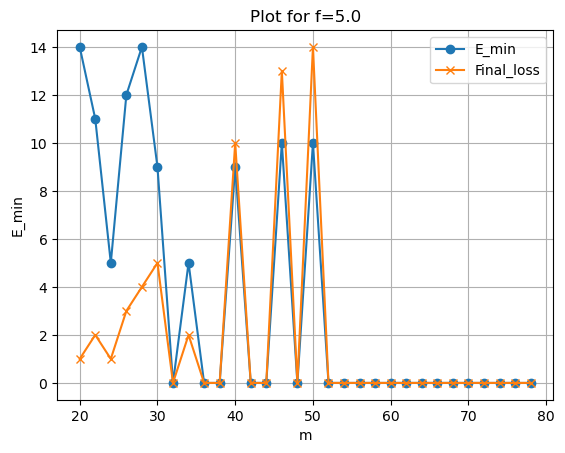

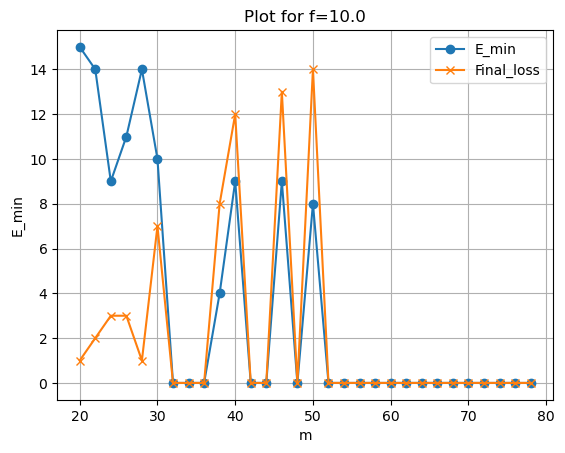

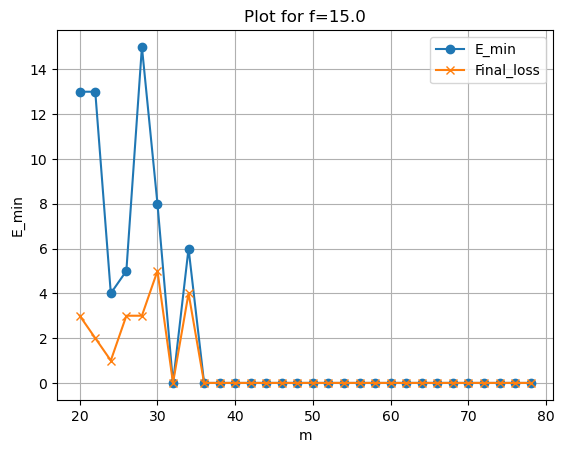

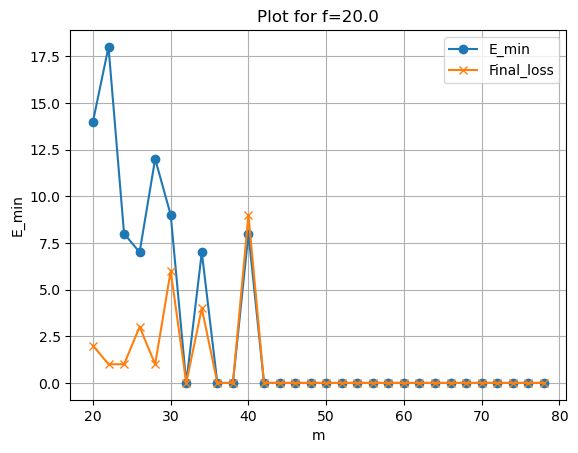

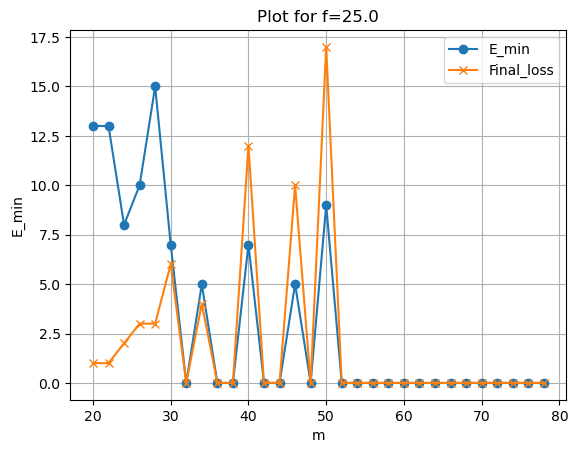

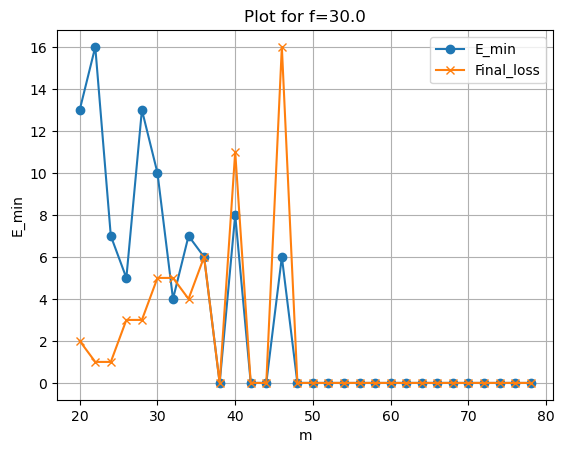

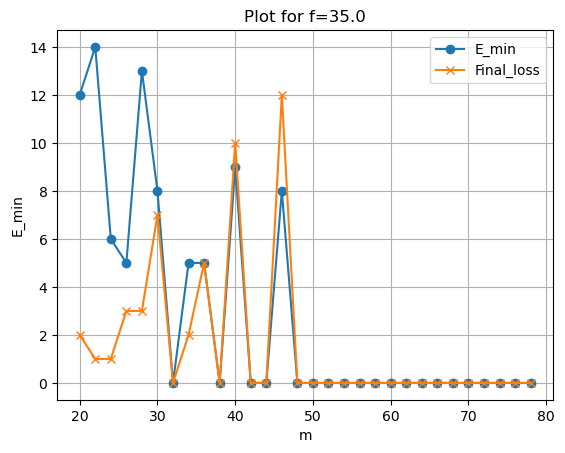

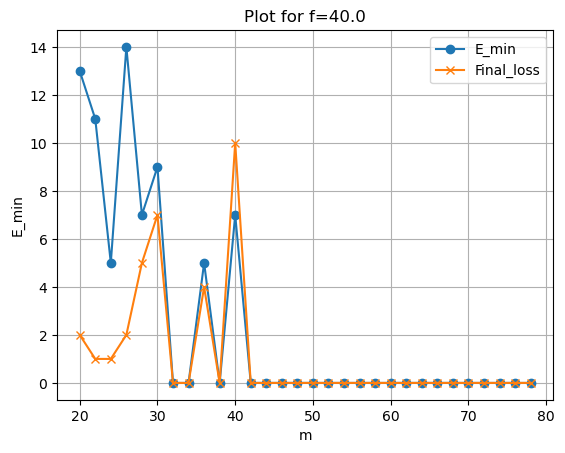

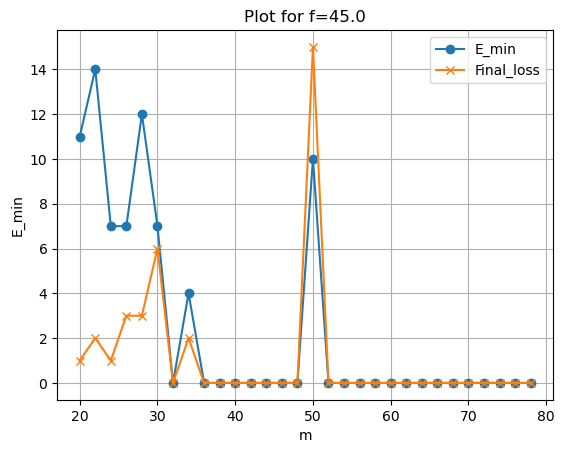

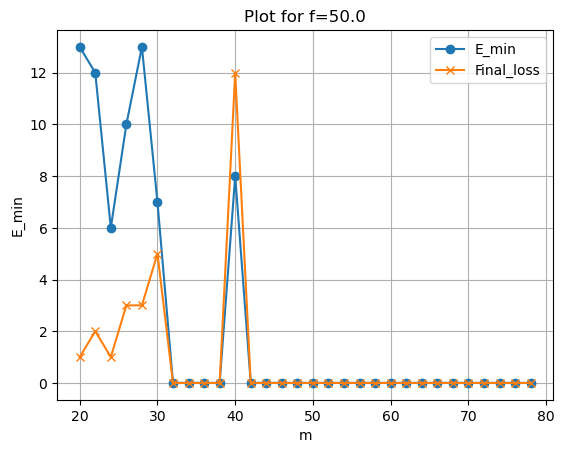

In [387]:
groups=df.groupby(swept_val_name)
# for name, group in groups:
#     sorted_group = group.sort_values(by=x_axis)
#     print(sorted_group[["f","m","Final_loss_min"]])
for name, group in groups:
    plt.figure()
    plt.plot(group.sort_values(by=x_axis)[x_axis], group.sort_values(by=x_axis)[y_axis], marker='o', linestyle='-', label="E_min")
    plt.plot(group.sort_values(by=x_axis)[x_axis], group.sort_values(by=x_axis)["Final_loss_min"], marker='x', linestyle='-', label="Final_loss")

    plt.title(f'Plot for {swept_val_name}={name}')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.grid(True)
    plt.legend()
    plt.show()

In [302]:
df

,n,m,k,p,f,length_ave,length_sd,length_min,length_th_ave,length_th_sd,...,FN_min,FN_th_ave,FN_th_sd,FN_th_min,Final_loss_ave,Final_loss_sd,Final_loss_min,Final_loss_th_ave,Final_loss_th_sd,Final_loss_th_min
0,100,30,10,0.2,5.0,11.5,0.500000,11,0.0,0.0,...,5,10.0,0.0,10,6.5,1.962142,4,115.0,0.0,115
1,100,30,10,0.2,10.0,11.4,0.916515,10,0.0,0.0,...,5,10.0,0.0,10,7.3,1.846619,5,115.0,0.0,115
2,100,25,10,0.2,5.0,12.6,1.356466,10,0.0,0.0,...,3,10.0,0.0,10,4.7,1.004988,3,131.0,0.0,131
3,100,25,10,0.2,10.0,12.7,0.781025,11,0.0,0.0,...,5,10.0,0.0,10,4.3,1.417745,2,131.0,0.0,131
4,100,55,10,0.2,5.0,10.7,0.781025,10,0.0,0.0,...,0,10.0,0.0,10,16.8,11.443776,0,324.0,0.0,324
5,100,55,10,0.2,10.0,10.5,0.670820,10,0.0,0.0,...,0,10.0,0.0,10,15.2,16.178999,0,324.0,0.0,324
6,100,40,10,0.2,5.0,11.8,1.249000,10,0.0,0.0,...,0,10.0,0.0,10,11.8,6.982836,0,290.0,0.0,290
7,100,40,10,0.2,10.0,12.0,1.095445,10,0.0,0.0,...,0,10.0,0.0,10,12.7,5.367495,0,290.0,0.0,290
8,100,50,10,0.2,5.0,11.1,0.830662,10,0.0,0.0,...,0,10.0,0.0,10,14.1,9.964437,0,318.0,0.0,318
9,100,50,10,0.2,10.0,11.1,0.830662,10,0.0,0.0,...,0,10.0,0.0,10,12.7,7.225649,0,318.0,0.0,318
